In [148]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import *

In [97]:
df1=pd.read_csv("train.csv")
df2=pd.read_csv("test.csv")

corr() is used to check the relation between each of the columns

In [98]:
df1.corr()

,id,campaign_var_1,campaign_var_2,products_purchased,user_activity_var_1,user_activity_var_2,user_activity_var_3,user_activity_var_4,user_activity_var_5,user_activity_var_6,user_activity_var_7,user_activity_var_8,user_activity_var_9,user_activity_var_10,user_activity_var_11,user_activity_var_12,buy
id,1.00,0.14,0.22,-0.03,0.01,-0.01,-0.00,-0.02,-0.01,0.01,0.02,-0.04,-0.02,0.00,0.03,-0.01,-0.02
campaign_var_1,0.14,1.00,0.56,-0.01,0.02,-0.03,-0.01,-0.03,-0.02,0.03,-0.07,-0.01,-0.06,-0.00,-0.02,-0.01,-0.09
campaign_var_2,0.22,0.56,1.00,0.02,-0.03,-0.04,-0.01,-0.04,-0.03,0.07,-0.05,-0.03,-0.06,-0.01,-0.00,-0.01,-0.08
products_purchased,-0.03,-0.01,0.02,1.00,-0.01,0.01,0.00,0.01,-0.01,0.00,0.01,-0.01,0.01,0.00,-0.00,-0.01,0.00
user_activity_var_1,0.01,0.02,-0.03,-0.01,1.00,0.01,-0.03,0.02,-0.02,-0.19,-0.09,-0.05,0.03,0.01,-0.06,0.00,0.04
user_activity_var_2,-0.01,-0.03,-0.04,0.01,0.01,1.00,-0.00,0.13,0.06,-0.01,-0.02,-0.04,0.16,0.05,0.09,0.02,0.35
user_activity_var_3,-0.00,-0.01,-0.01,0.00,-0.03,-0.00,1.00,0.00,0.02,-0.05,-0.01,-0.03,0.00,0.02,-0.03,0.01,0.01
user_activity_var_4,-0.02,-0.03,-0.04,0.01,0.02,0.13,0.00,1.00,0.07,-0.02,-0.00,-0.04,0.20,0.05,0.07,0.04,0.39
user_activity_var_5,-0.01,-0.02,-0.03,-0.01,-0.02,0.06,0.02,0.07,1.00,-0.08,-0.01,-0.03,0.07,0.03,0.02,0.02,0.16
user_activity_var_6,0.01,0.03,0.07,0.00,-0.19,-0.01,-0.05,-0.02,-0.08,1.00,-0.17,-0.06,-0.01,0.00,-0.08,0.00,-0.01


In [99]:
df2.corr()

,id,campaign_var_1,campaign_var_2,products_purchased,user_activity_var_1,user_activity_var_2,user_activity_var_3,user_activity_var_4,user_activity_var_5,user_activity_var_6,user_activity_var_7,user_activity_var_8,user_activity_var_9,user_activity_var_10,user_activity_var_11,user_activity_var_12
id,1.00,0.12,0.16,-0.03,0.01,-0.02,0.01,-0.02,-0.01,0.02,0.02,-0.03,-0.01,-0.00,0.01,-0.01
campaign_var_1,0.12,1.00,0.56,-0.01,0.02,-0.04,-0.01,-0.03,-0.03,0.02,-0.09,-0.01,-0.05,-0.02,-0.01,-0.01
campaign_var_2,0.16,0.56,1.00,0.00,-0.05,-0.06,-0.01,-0.06,-0.05,0.06,-0.05,-0.04,-0.09,-0.01,-0.03,-0.01
products_purchased,-0.03,-0.01,0.00,1.00,-0.01,0.01,0.01,0.04,0.01,-0.01,-0.01,0.01,-0.01,-0.02,0.03,-0.00
user_activity_var_1,0.01,0.02,-0.05,-0.01,1.00,0.03,-0.02,0.03,0.00,-0.20,-0.08,-0.05,0.03,-0.00,-0.05,0.01
user_activity_var_2,-0.02,-0.04,-0.06,0.01,0.03,1.00,0.00,0.11,0.04,0.01,-0.02,-0.02,0.06,-0.00,0.10,-0.00
user_activity_var_3,0.01,-0.01,-0.01,0.01,-0.02,0.00,1.00,0.01,0.02,-0.06,-0.01,-0.01,-0.01,-0.01,-0.04,-0.01
user_activity_var_4,-0.02,-0.03,-0.06,0.04,0.03,0.11,0.01,1.00,0.04,-0.01,-0.00,-0.03,0.18,-0.00,0.09,-0.00
user_activity_var_5,-0.01,-0.03,-0.05,0.01,0.00,0.04,0.02,0.04,1.00,-0.08,-0.02,-0.04,0.08,-0.01,0.03,0.02
user_activity_var_6,0.02,0.02,0.06,-0.01,-0.20,0.01,-0.06,-0.01,-0.08,1.00,-0.16,-0.05,-0.02,0.00,-0.09,-0.01


In [100]:
df1.shape

(39161, 19)

In [101]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39161 entries, 0 to 39160
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    39161 non-null  int64  
 1   created_at            39161 non-null  object 
 2   campaign_var_1        39161 non-null  int64  
 3   campaign_var_2        39161 non-null  int64  
 4   products_purchased    18250 non-null  float64
 5   signup_date           24048 non-null  object 
 6   user_activity_var_1   39161 non-null  int64  
 7   user_activity_var_2   39161 non-null  int64  
 8   user_activity_var_3   39161 non-null  int64  
 9   user_activity_var_4   39161 non-null  int64  
 10  user_activity_var_5   39161 non-null  int64  
 11  user_activity_var_6   39161 non-null  int64  
 12  user_activity_var_7   39161 non-null  int64  
 13  user_activity_var_8   39161 non-null  int64  
 14  user_activity_var_9   39161 non-null  int64  
 15  user_activity_var_1

isna().sum() is used to get for the sum of the na for each column

In [102]:
df1.isna().sum()

id                          0
created_at                  0
campaign_var_1              0
campaign_var_2              0
products_purchased      20911
signup_date             15113
user_activity_var_1         0
user_activity_var_2         0
user_activity_var_3         0
user_activity_var_4         0
user_activity_var_5         0
user_activity_var_6         0
user_activity_var_7         0
user_activity_var_8         0
user_activity_var_9         0
user_activity_var_10        0
user_activity_var_11        0
user_activity_var_12        0
buy                         0
dtype: int64

In [103]:
df1.buy.value_counts()

0    37163
1     1998
Name: buy, dtype: int64

In [104]:
df2.shape

(13184, 18)

In [105]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13184 entries, 0 to 13183
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    13184 non-null  int64  
 1   created_at            13184 non-null  object 
 2   campaign_var_1        13184 non-null  int64  
 3   campaign_var_2        13184 non-null  int64  
 4   products_purchased    5048 non-null   float64
 5   signup_date           6535 non-null   object 
 6   user_activity_var_1   13184 non-null  int64  
 7   user_activity_var_2   13184 non-null  int64  
 8   user_activity_var_3   13184 non-null  int64  
 9   user_activity_var_4   13184 non-null  int64  
 10  user_activity_var_5   13184 non-null  int64  
 11  user_activity_var_6   13184 non-null  int64  
 12  user_activity_var_7   13184 non-null  int64  
 13  user_activity_var_8   13184 non-null  int64  
 14  user_activity_var_9   13184 non-null  int64  
 15  user_activity_var_1

In [106]:
df2.isna().sum()
# as we can see the number of na values are many and if we remove it then we might loss information, so here we can fill the na values

id                         0
created_at                 0
campaign_var_1             0
campaign_var_2             0
products_purchased      8136
signup_date             6649
user_activity_var_1        0
user_activity_var_2        0
user_activity_var_3        0
user_activity_var_4        0
user_activity_var_5        0
user_activity_var_6        0
user_activity_var_7        0
user_activity_var_8        0
user_activity_var_9        0
user_activity_var_10       0
user_activity_var_11       0
user_activity_var_12       0
dtype: int64

fillna() is used to fill the na values

In [107]:
#as here products_purchased is numerical so we will fill na with mean
# as here signup_date is categorical(object) so we fill na with the mode
df1.products_purchased = df1.products_purchased.fillna(df1.products_purchased.mean())
df1.signup_date = df1.signup_date.fillna(df1.signup_date.mode()[0])
df1.isna().sum()

id                      0
created_at              0
campaign_var_1          0
campaign_var_2          0
products_purchased      0
signup_date             0
user_activity_var_1     0
user_activity_var_2     0
user_activity_var_3     0
user_activity_var_4     0
user_activity_var_5     0
user_activity_var_6     0
user_activity_var_7     0
user_activity_var_8     0
user_activity_var_9     0
user_activity_var_10    0
user_activity_var_11    0
user_activity_var_12    0
buy                     0
dtype: int64

In [108]:
df1.buy.value_counts()

0    37163
1     1998
Name: buy, dtype: int64

In [109]:
#as here products_purchased is numerical so we will fill na with mean
# as here signup_date is categorical(object) so we fill na with the mode
df2.products_purchased = df1.products_purchased.fillna(df1.products_purchased.mean())
df2.signup_date = df1.signup_date.fillna(df1.signup_date.mode()[0])
df2.isna().sum()

id                      0
created_at              0
campaign_var_1          0
campaign_var_2          0
products_purchased      0
signup_date             0
user_activity_var_1     0
user_activity_var_2     0
user_activity_var_3     0
user_activity_var_4     0
user_activity_var_5     0
user_activity_var_6     0
user_activity_var_7     0
user_activity_var_8     0
user_activity_var_9     0
user_activity_var_10    0
user_activity_var_11    0
user_activity_var_12    0
dtype: int64

In [110]:
# astype to change the target(buy) column to categorical data
df1.buy = df1.buy.astype(str)

['id', 'created_at', 'campaign_var_1', 'campaign_var_2', 'products_purchased', 'signup_date', 'user_activity_var_1', 'user_activity_var_2', 'user_activity_var_3', 'user_activity_var_4', 'user_activity_var_5', 'user_activity_var_6', 'user_activity_var_7', 'user_activity_var_8', 'user_activity_var_9', 'user_activity_var_10', 'user_activity_var_11', 'user_activity_var_12']


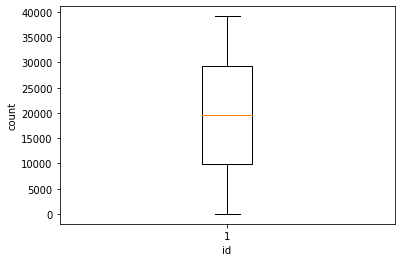

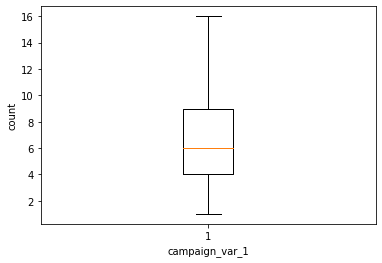

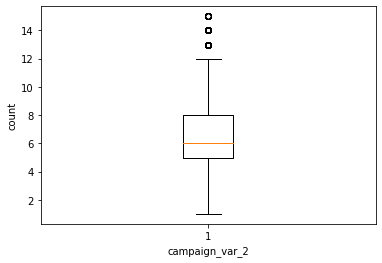

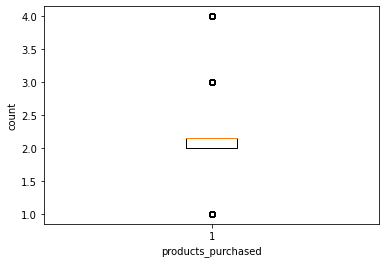

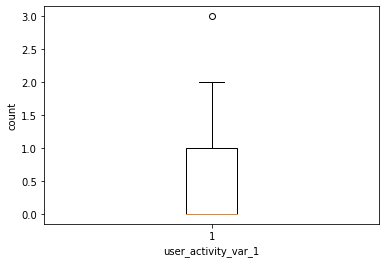

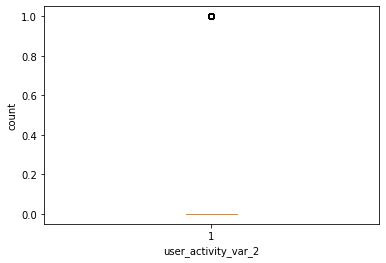

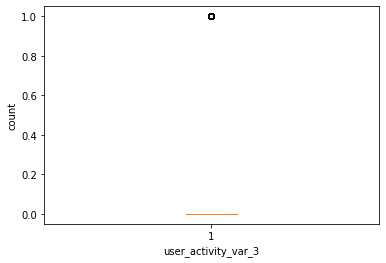

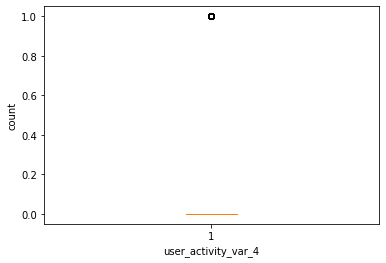

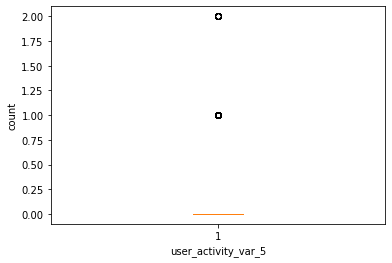

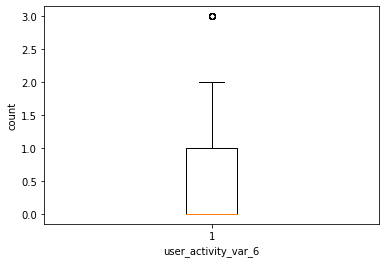

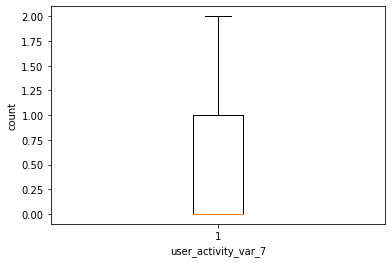

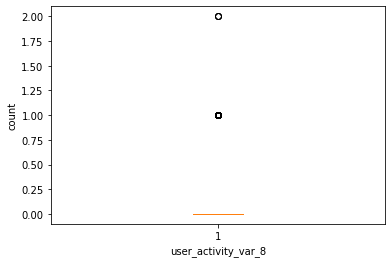

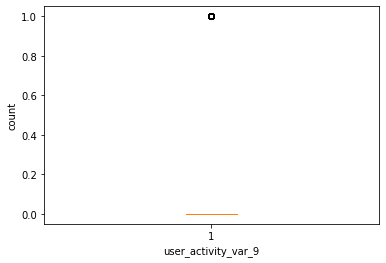

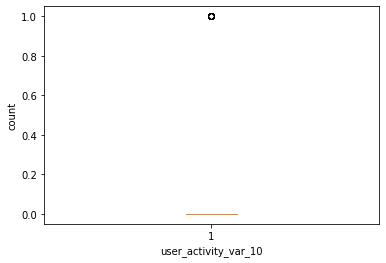

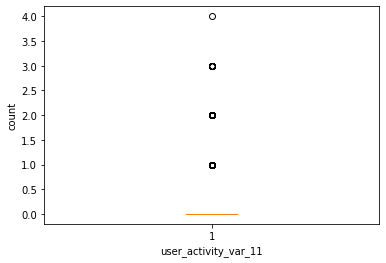

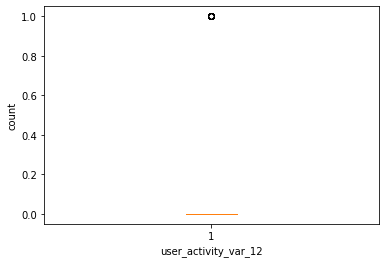

In [111]:
col1 = list(df1.columns)#converting to a list of the columns of train data
col1.remove('buy')#removing the target column as we will not evaluate it
print(list(col1))
for col_name in col1:
  if (df1[col_name].dtypes=='int64' or df1[col_name].dtypes=='float64'):
    plt.boxplot(df1[col_name])# making boxplot for all the columns except buy to check for outliers
    plt.xlabel(col_name)
    plt.ylabel('count')
    plt.show()

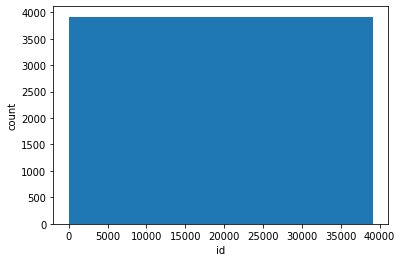

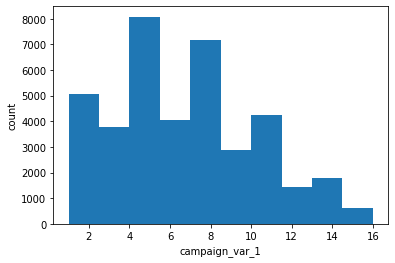

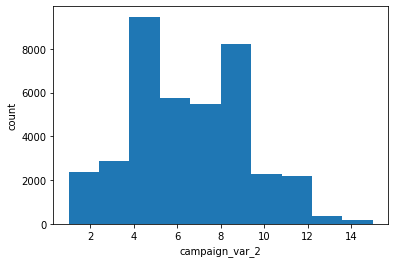

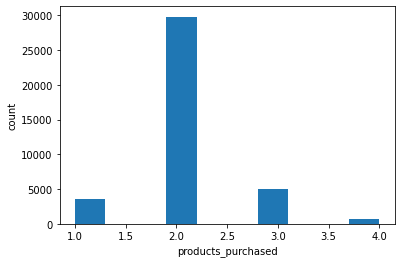

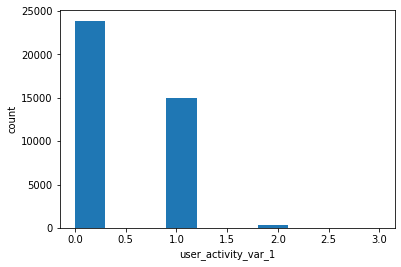

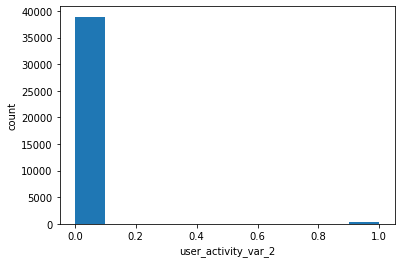

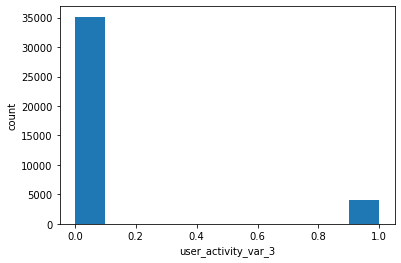

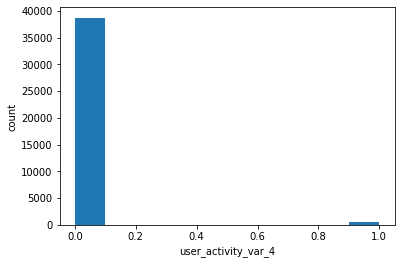

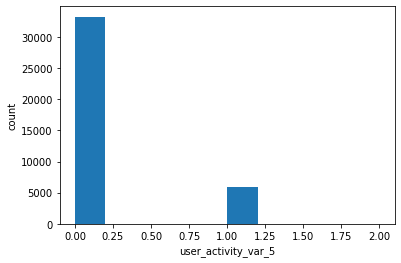

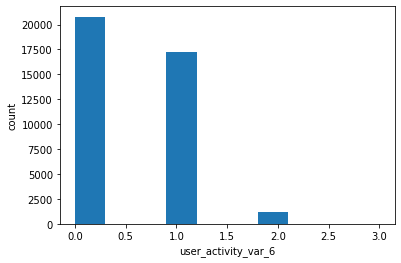

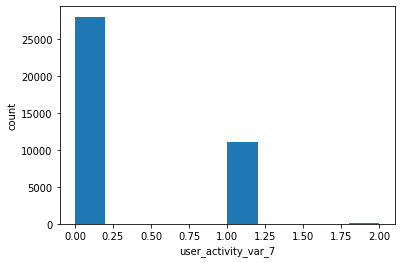

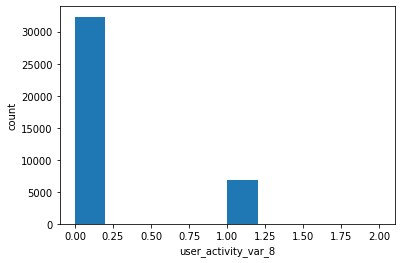

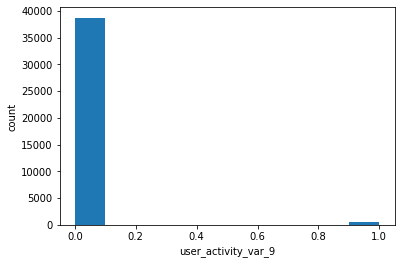

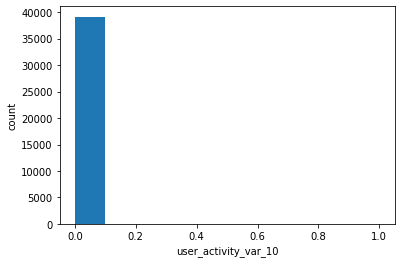

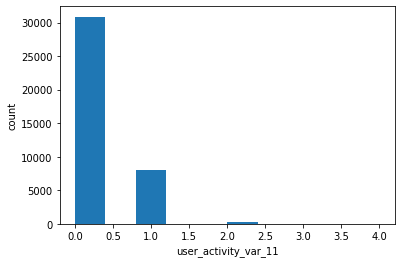

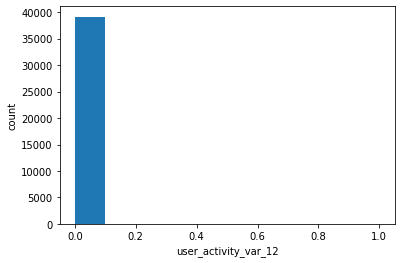

In [112]:
for col_name in col1:
  if (df1[col_name].dtypes=='int64' or df1[col_name].dtypes=='float64'):
    plt.hist(df1[col_name])#histogram plot for all the columns to check the distribution of data points
    plt.xlabel(col_name)
    plt.ylabel('count')
    plt.show()

In [113]:
# Inter Quartile Range is calculated here for each column
Q1 = df1.quantile(0.25)
Q3 = df1.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

id                     19580.00
campaign_var_1             5.00
campaign_var_2             3.00
products_purchased         0.15
user_activity_var_1        1.00
user_activity_var_2        0.00
user_activity_var_3        0.00
user_activity_var_4        0.00
user_activity_var_5        0.00
user_activity_var_6        1.00
user_activity_var_7        1.00
user_activity_var_8        0.00
user_activity_var_9        0.00
user_activity_var_10       0.00
user_activity_var_11       0.00
user_activity_var_12       0.00
dtype: float64


In [114]:
#handling the outliers thereby removing it
df1 = df1[~((df1 < (Q1 - 1.5 * IQR)) |(df1 > (Q3 + 1.5 * IQR))).any(axis=1)]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  


In [115]:
df1.shape

(14038, 19)

In [116]:
df1.buy.value_counts()

0    13882
1      156
Name: buy, dtype: int64

In [117]:
df1.head()

,id,created_at,campaign_var_1,campaign_var_2,products_purchased,signup_date,user_activity_var_1,user_activity_var_2,user_activity_var_3,user_activity_var_4,user_activity_var_5,user_activity_var_6,user_activity_var_7,user_activity_var_8,user_activity_var_9,user_activity_var_10,user_activity_var_11,user_activity_var_12,buy
3,4,2021-01-01,6,7,2.00,2017-10-04,0,0,0,0,0,0,0,0,0,0,0,0,0
15,16,2021-01-01,7,2,2.15,2021-03-09,0,0,0,0,0,0,0,0,0,0,0,0,0
20,21,2021-01-01,4,2,2.15,2021-07-22,0,0,0,0,0,1,1,0,0,0,0,0,0
21,22,2021-01-02,9,7,2.15,2021-07-18,1,0,0,0,0,0,1,0,0,0,0,0,0
22,23,2021-01-02,5,6,2.15,2021-07-18,1,0,0,0,0,1,0,0,0,0,0,0,0


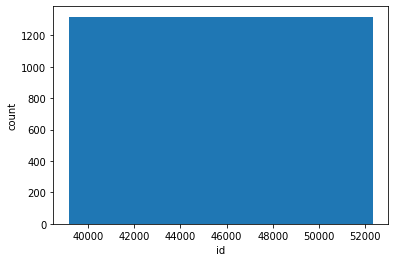

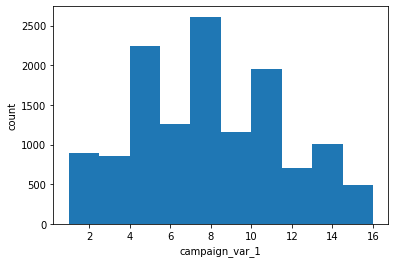

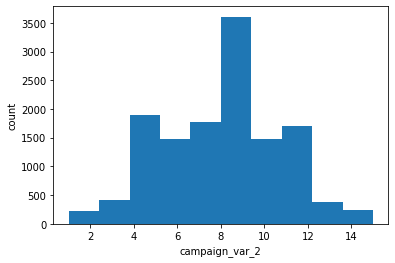

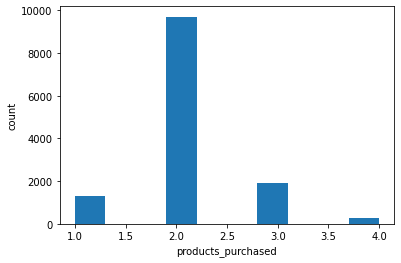

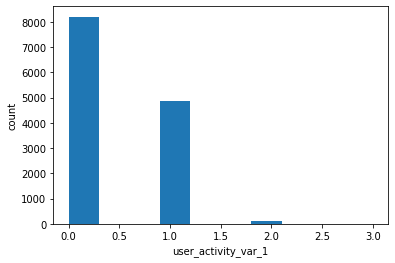

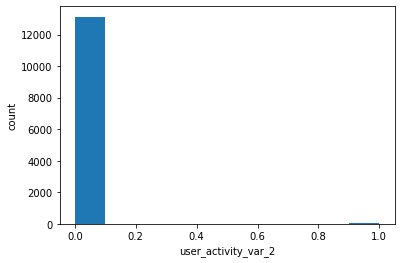

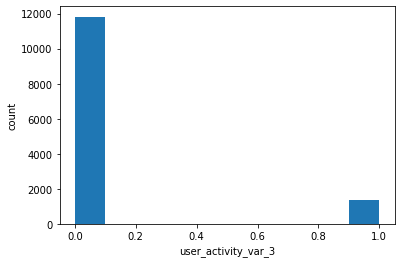

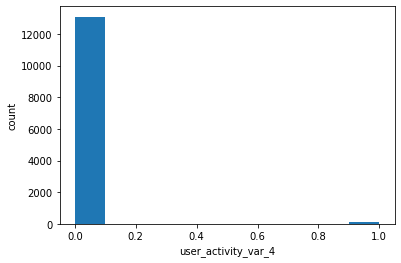

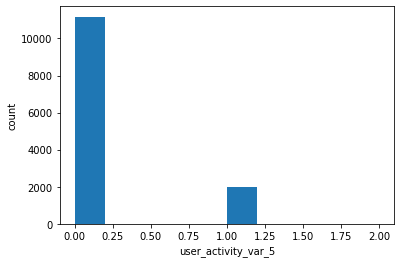

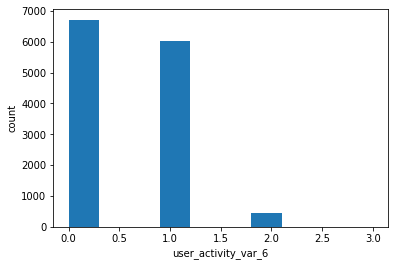

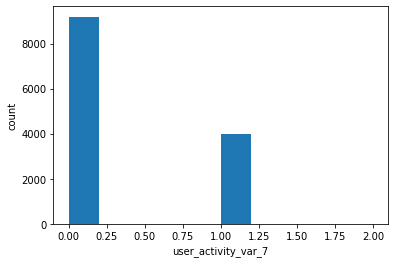

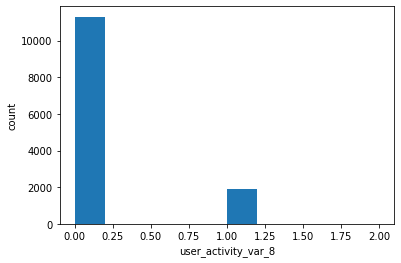

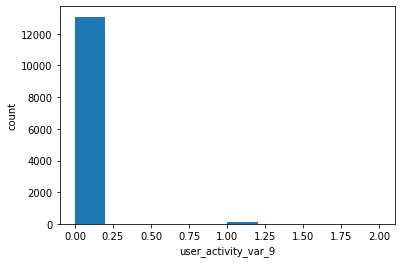

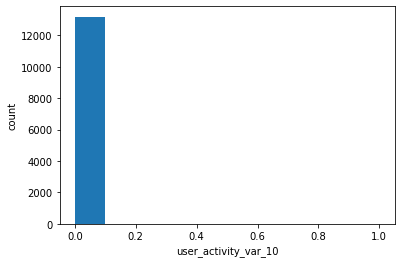

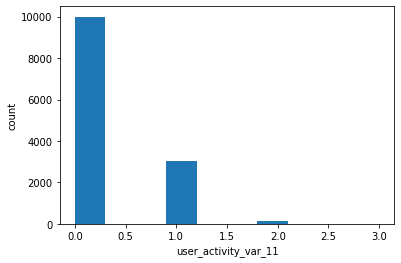

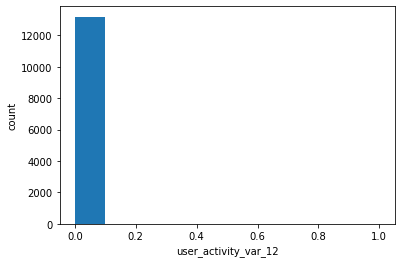

In [118]:
col2 = list(df2.columns)#list of all the columns of test data
for col_name in col2:
  if (df2[col_name].dtypes=='int64' or df2[col_name].dtypes=='float64'):
    plt.hist(df2[col_name])#histogram to get the distribution of all the data points
    plt.xlabel(col_name)
    plt.ylabel('count')
    plt.show()

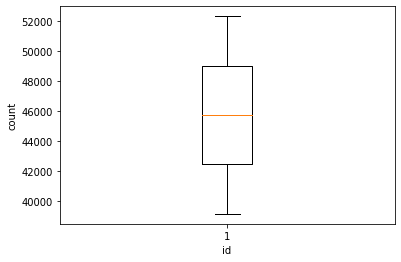

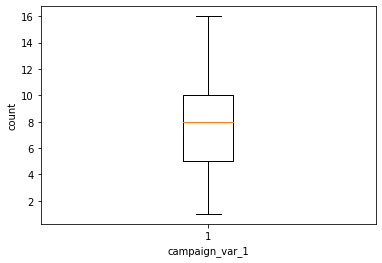

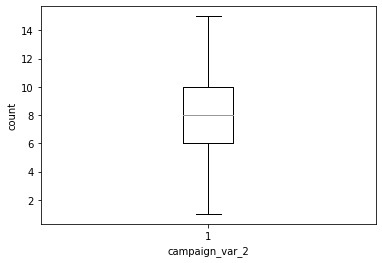

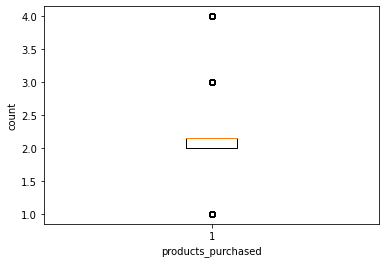

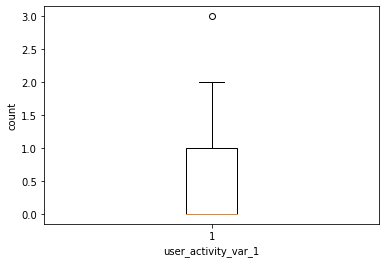

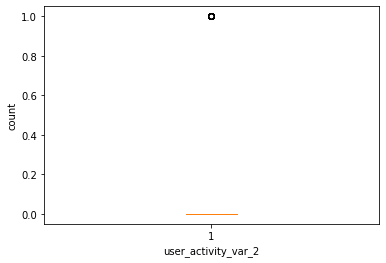

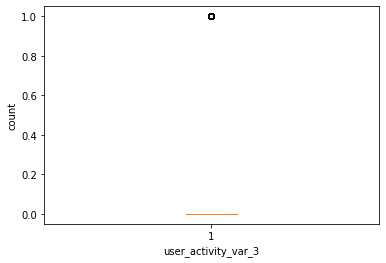

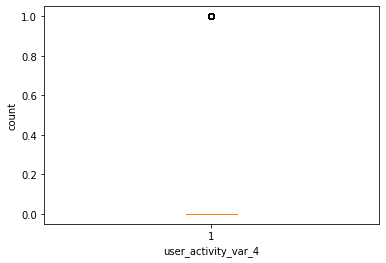

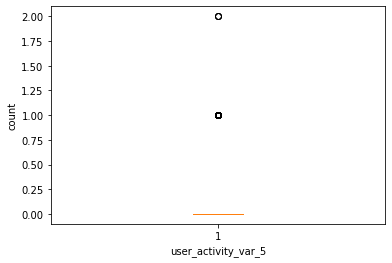

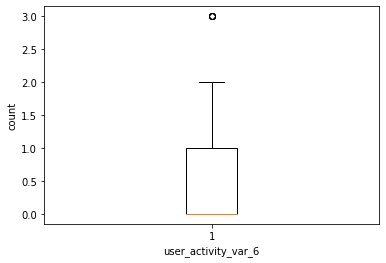

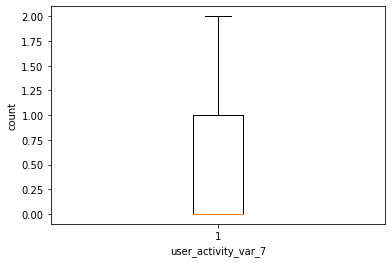

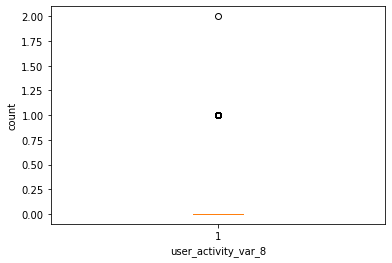

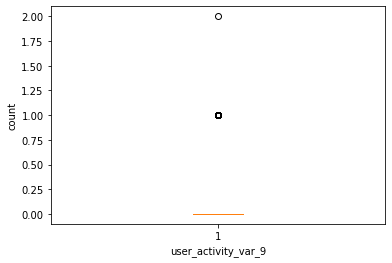

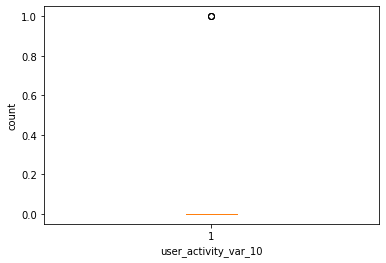

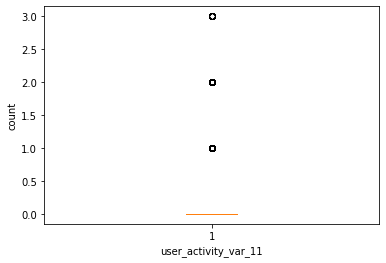

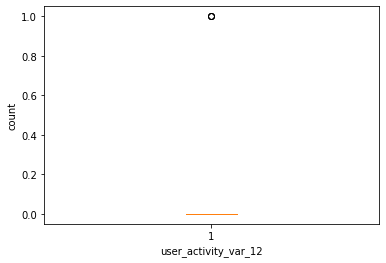

In [119]:
for col_name in col2:
  if (df2[col_name].dtypes=='int64' or df2[col_name].dtypes=='float64'):
    plt.boxplot(df2[col_name])#boxplot for test data to check for outliers
    plt.xlabel(col_name)
    plt.ylabel('count')
    plt.show()

In [120]:
#Finding the outliers for each column of test set
Q1 = df2.quantile(0.25)
Q3 = df2.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

id                     6591.50
campaign_var_1            5.00
campaign_var_2            4.00
products_purchased        0.15
user_activity_var_1       1.00
user_activity_var_2       0.00
user_activity_var_3       0.00
user_activity_var_4       0.00
user_activity_var_5       0.00
user_activity_var_6       1.00
user_activity_var_7       1.00
user_activity_var_8       0.00
user_activity_var_9       0.00
user_activity_var_10      0.00
user_activity_var_11      0.00
user_activity_var_12      0.00
dtype: float64


In [121]:
df2.shape

(13184, 18)

In [122]:
df1['created_at'] = pd.to_datetime(df1['created_at'])
df2['created_at'] = pd.to_datetime(df2['created_at'])
df1['signup_date'] = pd.to_datetime(df1['signup_date'])
df2['signup_date'] = pd.to_datetime(df2['signup_date'])

In [123]:
df1['sub_days'] = df1['created_at']-df1['signup_date']
df2['sub_days'] = df2['created_at']-df2['signup_date']

In [124]:
df2.sub_days

0        464 days
1        469 days
2        143 days
3       1550 days
4        572 days
           ...   
13179   1191 days
13180    388 days
13181    270 days
13182    463 days
13183    816 days
Name: sub_days, Length: 13184, dtype: timedelta64[ns]

In [125]:
df1['signup_dom'] = df1['signup_date'].dt.day
df2['signup_dom'] = df2['signup_date'].dt.day
df1['signup_month'] = df1['signup_date'].dt.month
df2['signup_month'] = df2['signup_date'].dt.month
df1['signup_year'] = df1['signup_date'].dt.year
df2['signup_year'] = df2['signup_date'].dt.year
df1['signup_dow'] = df1['signup_date'].dt.dayofweek
df2['signup_dow'] = df2['signup_date'].dt.dayofweek

In [126]:
df1.describe()

,id,campaign_var_1,campaign_var_2,products_purchased,user_activity_var_1,user_activity_var_2,user_activity_var_3,user_activity_var_4,user_activity_var_5,user_activity_var_6,...,user_activity_var_8,user_activity_var_9,user_activity_var_10,user_activity_var_11,user_activity_var_12,sub_days,signup_dom,signup_month,signup_year,signup_dow
count,14038.00,14038.00,14038.00,14038.00,14038.00,14038.00,14038.00,14038.00,14038.00,14038.00,...,14038.00,14038.00,14038.00,14038.00,14038.00,14038,14038.00,14038.00,14038.00,14038.00
mean,19895.32,6.73,6.52,2.11,0.44,0.00,0.00,0.00,0.00,0.57,...,0.00,0.00,0.00,0.00,0.00,168 days 04:01:58.991309304,16.79,6.67,2020.64,4.31
std,11208.85,3.45,2.51,0.07,0.52,0.00,0.00,0.00,0.00,0.57,...,0.00,0.00,0.00,0.00,0.00,307 days 19:52:11.637096216,6.71,2.72,0.86,2.11
min,4.00,1.00,1.00,2.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,-445 days +00:00:00,1.00,1.00,2016.00,0.00
25%,10309.25,4.00,5.00,2.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,-25 days +00:00:00,14.00,6.00,2020.00,3.00
50%,19980.50,6.00,6.00,2.15,0.00,0.00,0.00,0.00,0.00,1.00,...,0.00,0.00,0.00,0.00,0.00,92 days 00:00:00,18.00,7.00,2021.00,6.00
75%,29642.00,9.00,8.00,2.15,1.00,0.00,0.00,0.00,0.00,1.00,...,0.00,0.00,0.00,0.00,0.00,260 days 00:00:00,18.00,7.00,2021.00,6.00
max,39161.00,16.00,12.00,2.15,2.00,0.00,0.00,0.00,0.00,2.00,...,0.00,0.00,0.00,0.00,0.00,1997 days 00:00:00,31.00,12.00,2022.00,6.00


In [127]:
df1.head()

,id,created_at,campaign_var_1,campaign_var_2,products_purchased,signup_date,user_activity_var_1,user_activity_var_2,user_activity_var_3,user_activity_var_4,...,user_activity_var_9,user_activity_var_10,user_activity_var_11,user_activity_var_12,buy,sub_days,signup_dom,signup_month,signup_year,signup_dow
3,4,2021-01-01,6,7,2.00,2017-10-04,0,0,0,0,...,0,0,0,0,0,1185 days,4,10,2017,2
15,16,2021-01-01,7,2,2.15,2021-03-09,0,0,0,0,...,0,0,0,0,0,-67 days,9,3,2021,1
20,21,2021-01-01,4,2,2.15,2021-07-22,0,0,0,0,...,0,0,0,0,0,-202 days,22,7,2021,3
21,22,2021-01-02,9,7,2.15,2021-07-18,1,0,0,0,...,0,0,0,0,0,-197 days,18,7,2021,6
22,23,2021-01-02,5,6,2.15,2021-07-18,1,0,0,0,...,0,0,0,0,0,-197 days,18,7,2021,6


In [128]:
df1.sub_days.dtypes

dtype('<m8[ns]')

In [129]:
df1['sub_days'] = df1['sub_days'].astype('timedelta64[ns]')
# df1.dtypes
df1['sub_days'] = df1['sub_days']//np.timedelta64(1, 'ns')
df1.sub_days

df2['sub_days'] = df2['sub_days'].astype('timedelta64[ns]')
df2['sub_days'] = df2['sub_days']//np.timedelta64(1, 'ns')

In [147]:
df2['sub_days'] = df2['sub_days'].astype('int')
df1['sub_days'] = df1['sub_days'].astype('int')


In [131]:
df1 = df1.drop(['id','created_at','signup_date'],axis=1)
df2 = df2.drop(['id','created_at','signup_date'],axis=1)

In [132]:
pd.options.display.float_format = '{:.2f}'.format

In [133]:
x = df1.drop('buy', axis=1)
y = df1.buy#traget column (buy)

In [134]:
df1.iloc[:,-1]

3        2
15       1
20       3
21       6
22       6
        ..
39138    1
39142    3
39144    6
39146    6
39160    6
Name: signup_dow, Length: 14038, dtype: int64

In [135]:
#train_test_split is used to split the train data into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(x, y,random_state=0)

In [136]:
X_test

,campaign_var_1,campaign_var_2,products_purchased,user_activity_var_1,user_activity_var_2,user_activity_var_3,user_activity_var_4,user_activity_var_5,user_activity_var_6,user_activity_var_7,user_activity_var_8,user_activity_var_9,user_activity_var_10,user_activity_var_11,user_activity_var_12,sub_days,signup_dom,signup_month,signup_year,signup_dow
31917,13,8,2.15,1,0,0,0,0,0,1,0,0,0,0,0,10454400000000000,18,7,2021,6
19699,8,8,2.15,0,0,0,0,0,2,0,0,0,0,0,0,9158400000000000,10,5,2021,0
22171,5,10,2.00,1,0,0,0,0,0,0,0,0,0,0,0,4752000000000000,18,7,2021,6
1032,6,6,2.15,1,0,0,0,0,1,0,0,0,0,0,0,18230400000000000,29,6,2020,0
19876,13,7,2.15,0,0,0,0,0,1,0,0,0,0,0,0,3283200000000000,18,7,2021,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16979,16,8,2.15,1,0,0,0,0,1,0,0,0,0,0,0,9763200000000000,12,4,2021,0
9544,10,5,2.15,0,0,0,0,0,0,1,0,0,0,0,0,67910400000000000,3,4,2019,2
33106,3,5,2.15,0,0,0,0,0,1,1,0,0,0,0,0,12355200000000000,3,7,2021,5
1947,4,7,2.00,1,0,0,0,0,0,1,0,0,0,0,0,-13305600000000000,18,7,2021,6


In [137]:
Y_test

31917    0
19699    0
22171    0
1032     0
19876    0
        ..
16979    0
9544     0
33106    0
1947     0
26124    0
Name: buy, Length: 3510, dtype: object

In [138]:
clf = tree.DecisionTreeClassifier()#clf is untrained model
clf.fit(X_train,Y_train)#training the model on top of train data

DecisionTreeClassifier()

In [139]:
Y_test_pred = clf.predict(X_test)#predicting y from the X_test
Y_test_pred

array(['0', '0', '0', ..., '0', '0', '0'], dtype=object)

Public Confusion matrix


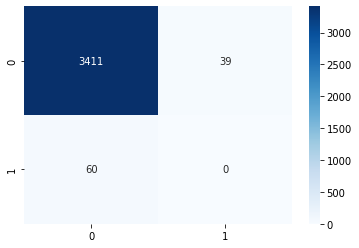

In [140]:
#here confusion matrix is plotted between the y test public of test data(predicted) and y test of train data(actual)
from sklearn.metrics import confusion_matrix
def plot_confusionmatrix(Y_test_pred,Y_test):
    print('Public Confusion matrix')
    cf = confusion_matrix(Y_test_pred,Y_test)
    sns.heatmap(cf,annot=True,cmap='Blues', fmt='g')
    plt.show()
    
plot_confusionmatrix(Y_test_pred,Y_test)

In [141]:
#assigning a variable to the confusion matrix 
cm = confusion_matrix(Y_test,Y_test_pred)
cm

array([[3411,   60],
       [  39,    0]])

In [142]:
from sklearn.metrics import classification_report
print(classification_report(Y_test,Y_test_pred))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99      3471
           1       0.00      0.00      0.00        39

    accuracy                           0.97      3510
   macro avg       0.49      0.49      0.49      3510
weighted avg       0.98      0.97      0.97      3510



In [143]:
tree_predict = clf.predict(df2)

In [144]:
submission=pd.read_csv("sample_submission.csv")
submission.head()

,id,buy
0,39162,1
1,39163,1
2,39164,1
3,39165,1
4,39166,1


In [145]:
submission['buy'] = tree_predict

In [146]:
submission.head()

,id,buy
0,39162,0
1,39163,0
2,39164,0
3,39165,0
4,39166,0
